# SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

# MADE BY DUMMY PROTASOV VITALY 575

In [17]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as train

Let's generate our dataset and take a look on it.

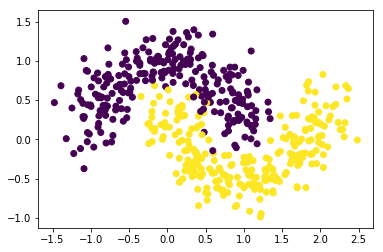

In [13]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

metric
 [[72 17]
 [11 75]]
metric
 [[72 17]
 [11 75]]


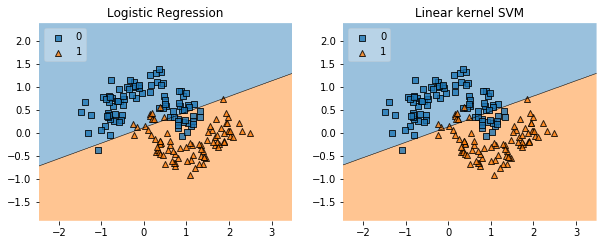

In [278]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

lr = LogisticRegression(solver='liblinear', random_state=0) # add some params
svm = SVC(kernel='linear', random_state=0) # here too

### YOUR CODE HERE
X, y = moons_points, moons_labels
X_train, X_test, y_train, y_test = train(moons_points, moons_labels, test_size=.35)
# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([lr, svm],
                         ['Logistic Regression', 'Linear kernel SVM'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    
    #classification metrics
    from sklearn.metrics import confusion_matrix, accuracy_score
    print('metric\n', confusion_matrix(y_test, y_predicted))
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
plt.show()

## 1.2 Kernel tirck

![keep-calm](i.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

# Answers

1) according to the confusion martix - quality(true guessed) of rbf kernel is higher than quality of sigmoid kernel(and poly from 1 to 10 degrees)

2) Emm.. changed under the mathematician representains of these functions :)

3) I have chosen the 3rd degreed(is default) because(again) by using the confusion matrix the sensativity is the highest!

metric rbf kernel
  [[84  3]
 [ 2 86]]
metric sigmoid kernel
  [[64 23]
 [26 62]]


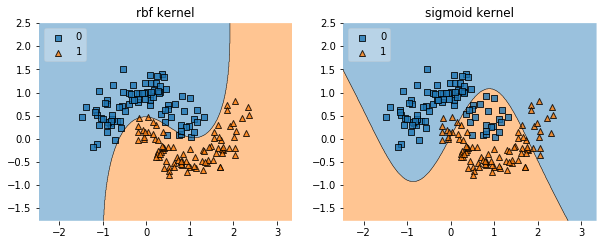

In [264]:
### YOUR CODE HERE
X, y = moons_points, moons_labels
X_train, X_test, y_train, y_test = train(moons_points, moons_labels, test_size=.35)
svm1 = SVC(kernel='rbf', gamma='auto')
svm2 = SVC(kernel='sigmoid', gamma='auto')
#svm3 = SVC(kernel='poly', degree= 3, gamma='auto')
# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([svm1, svm2],
                         ['rbf kernel', 'sigmoid kernel'],
                         itertools.product([0, 1], repeat=2)):
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    
    #classification metrics
    print('metric %s\n ' % lab, confusion_matrix(y_test, y_predicted))
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
plt.show()


### Play with degree

metric
 [[ 0 89]
 [ 0 86]]


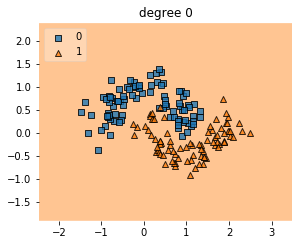

metric
 [[72 17]
 [11 75]]


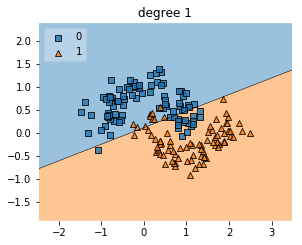

metric
 [[49 40]
 [ 4 82]]


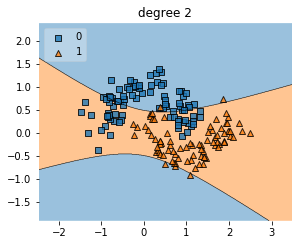

metric
 [[74 15]
 [15 71]]


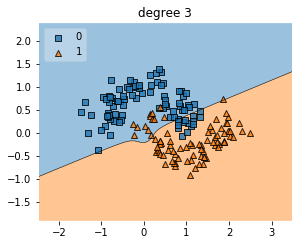

metric
 [[85  4]
 [40 46]]


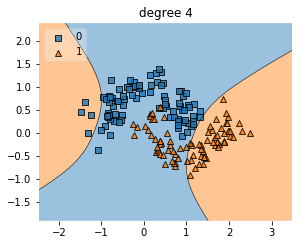

metric
 [[88  1]
 [34 52]]


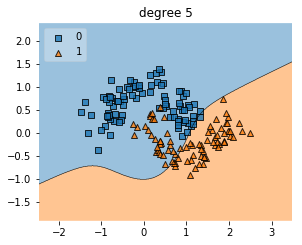

metric
 [[85  4]
 [43 43]]


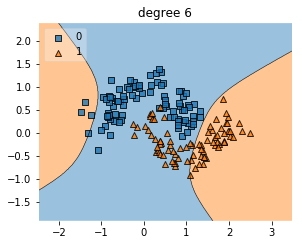

metric
 [[89  0]
 [41 45]]


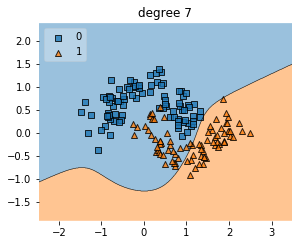

metric
 [[86  3]
 [45 41]]


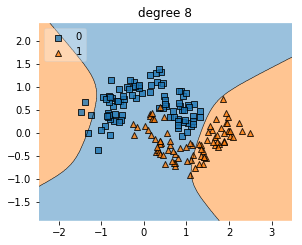

metric
 [[89  0]
 [42 44]]


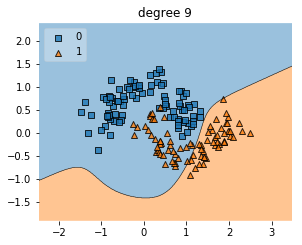

metric
 [[86  3]
 [45 41]]


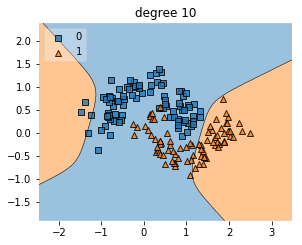

In [279]:
for i in range(11):
    svm3 = SVC(kernel='poly', degree = i, gamma='auto')
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(10, 8))

    for clf, lab, grd in zip([svm3], ['degree %s' % i], itertools.product([0, 1], repeat=2)):
        clf.fit(X_train, y_train)
        y_predicted = clf.predict(X_test)
    
    
        #classification metrics
        print('metric\n', confusion_matrix(y_test, y_predicted))
    
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
        plt.title(lab)
    plt.show()

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [275]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(1,5): #Degrees
    poly = PolynomialFeatures(degree = i)

    X_train_ = poly.fit_transform(X_train)
    X_test_ = poly.fit_transform(X_test)
    
    lr = LogisticRegression(solver='liblinear', random_state=0) # add some params

    lr.fit(X_train_, y_train)
    y_predicted = lr.predict(X_test_)

    print('metric of degree %s\n' % i, confusion_matrix(y_test, y_predicted))

metric of degree 1
 [[76 11]
 [11 77]]
metric of degree 2
 [[77 10]
 [13 75]]
metric of degree 3
 [[84  3]
 [ 1 87]]
metric of degree 4
 [[85  2]
 [ 0 88]]


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

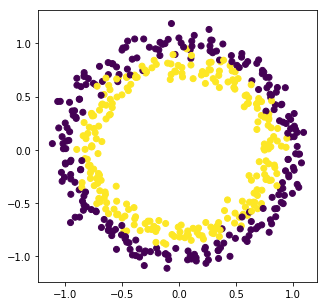

In [149]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

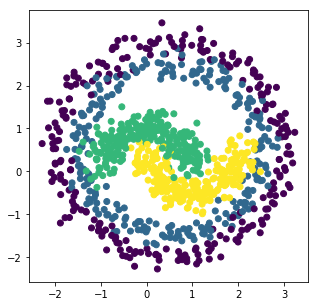

In [158]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [280]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train(points, labels, test_size=.30)


param_grid = {'C': np.linspace(0.01, 1, 10), 'penalty' : ['l1','l2'] }
clf = GridSearchCV(LogisticRegression(multi_class = 'multinomial', solver = 'saga'), 
                   param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

res = clf.fit(X_train,y_train)
res.best_params_

{'C': 0.01, 'penalty': 'l2'}

Metric
 [[12  0 26 33]
 [14  0 35 38]
 [15  0 42 15]
 [ 1  0 12 57]] 
 Accuracy: 0.37


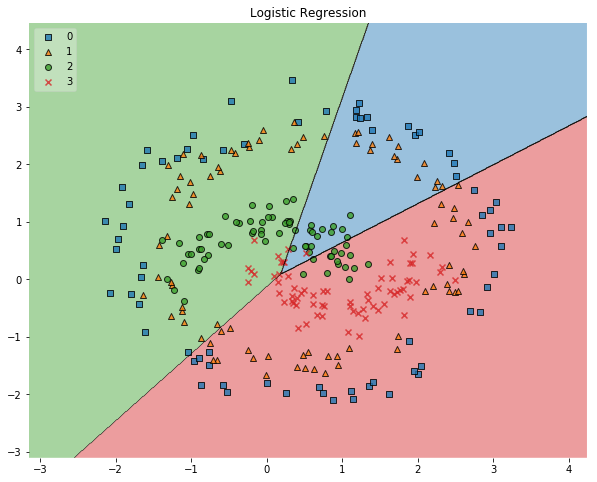

In [281]:
lr = LogisticRegression(multi_class = 'auto', solver='liblinear', random_state=0, C = 0.01, penalty = 'l2')

gs = gridspec.GridSpec(1, 1)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([lr], ['Logistic Regression'], itertools.product([0, 1], repeat=2)):
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    
    #classification metrics
    print('Metric\n', confusion_matrix(y_test, y_predicted), '\n Accuracy:', accuracy_score(y_test, y_predicted))
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
plt.show()

In [282]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train(points, labels, test_size=.30)


param_grid = {'C': np.linspace(0.01, 10, 10)}
clf = GridSearchCV(SVC(kernel='rbf'), 
                   param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

res = clf.fit(X_train,y_train)
res.best_params_

{'C': 2.23}

Metric
 [[66  4  0  0]
 [ 6 70  1  3]
 [ 0  3 75  1]
 [ 0  1  2 68]] 
 Accuracy: 0.93


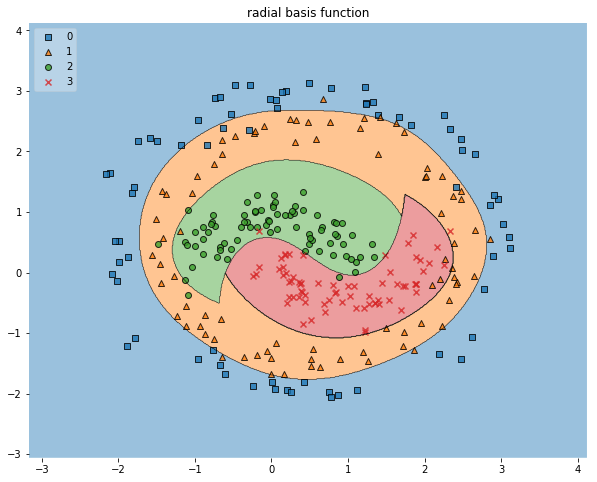

In [283]:
svm2 = SVC(kernel='rbf', C = 2.23)

gs = gridspec.GridSpec(1, 1)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([svm2], ['radial basis function'], itertools.product([0, 1], repeat=2)):
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    
    
    #classification metrics
    print('Metric\n', confusion_matrix(y_test, y_predicted), '\n Accuracy:', accuracy_score(y_test, y_predicted))
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
plt.show()

# Justify the results in a few phrases.

According to all above, SVM is STEEPER than LR in more than 2 times!!

BTW, I am dumb and couldn't improve the result of LR